Профессия Data Science  
Блок 4. Введение в машинное обучение  
**ML-5. Валидация данных и оценка моделей**

---

## **✍ Оглавление:**

2. Валидация данных. Методы валидации
3. Дисбаланс выборки
4. Недообучение и переобучение. Утечка данных
5. Кривая обучения
6. Практика

---

## **2. Валидация данных. Методы валидации**

→ Основная цель обучения модели — получить модель с хорошей прогностической способностью, которая решает поставленную задачу с заданным показателем метрики. 

Нам не столько важен результат предсказания на том наборе данных, на котором мы обучаем модель (нам уже известны все значения признаков в нём), сколько важно уметь предсказывать значения целевого признака для объектов, которых мы ещё не видели.

Таким образом, **главная цель машинного обучения — усвоить общие закономерности в данных, а не просто запомнить обучающий, или тренировочный, набор данных (training data)**.

Поэтому так важно иметь отложенный набор данных (с известными правильными ответами), который модель не видела во время обучения. На нём мы будем оценивать качество обученной модели.

набор данных, на котором мы проверяли качество построенной модели, мы называли **тестовым набором данных (testing data)**. Мы заранее выделяли этот набор данных для того, чтобы рассчитать финальную метрику модели и сделать вывод о том, устраивает ли нас качество моделирования. **Такой подход называется двухкомпонентным**.

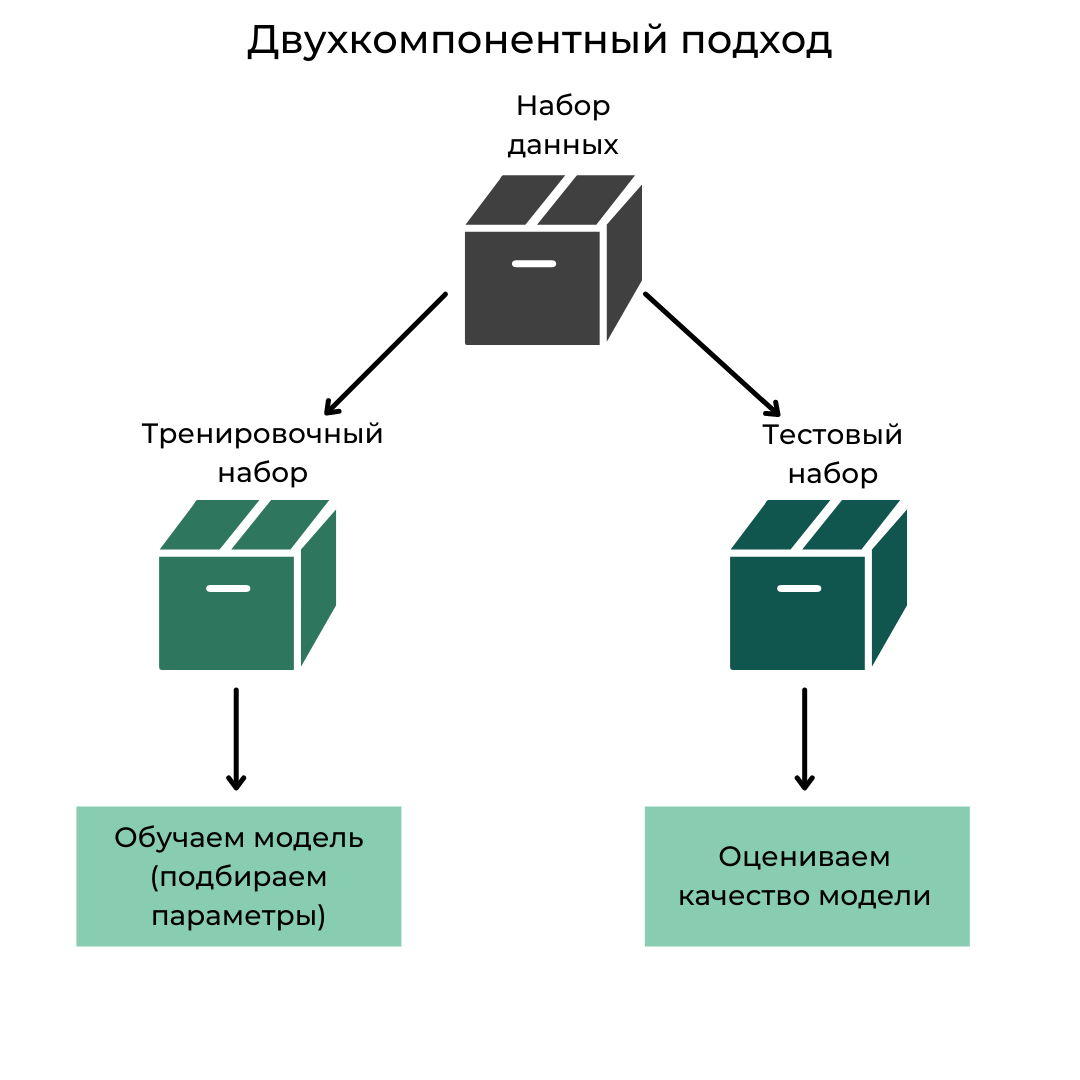

в больших Data Science-проектах используется не два, а три набора данных: в дополнение к тренировочному и тестовому набору данных выделяется **валидационный набор (validation data)**. Этот набор используется для промежуточного контроля качества модели и настройки внешних параметров, которые задаёт исследователь при построении модели. Такой подход называется **трёхкомпонентным.**

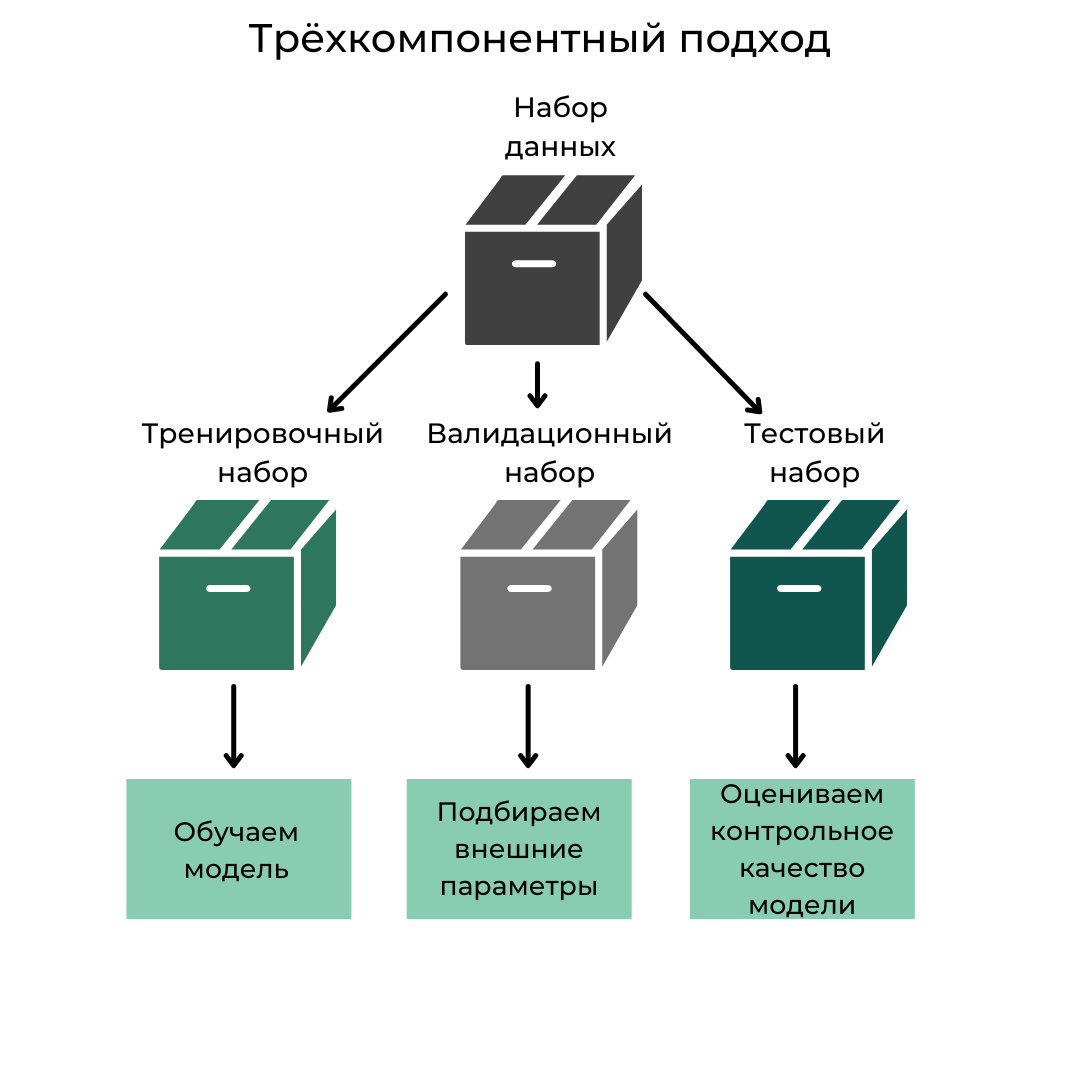

Итак, существует **три основных вида выборок**, которые используются в машинном обучении:

1. **Обучающая (тренировочная)** — набор данных, который используется в процессе обучения модели (подбора внутренних параметров, например коэффициентов линейной регрессии или предикатов в деревьях решений).

2. **Валидационная (проверочная)** — набор данных, на котором мы оцениваем промежуточные результаты обучения.

Основная цель создания такого набора данных — отслеживание переобучения.

На валидационной выборке мы производим подбор гиперпараметров — внешних параметров модели, например коэффициентов регуляризации, максимальной глубины дерева, количества деревьев в случайном лесу и т. д.

3. **Тестовая (контрольная)** — набор данных, который имитирует работу модели в реальных условиях после подбора всех параметров.

С помощью этого набора осуществляется окончательная проверка качества.

Главное условие для тестовой выборки — она должна быть независимой от обучающей.

**Тестирование** — это попытка что-то выяснить, а **валидация** — доказать, что что-то является истиной (в нашем случае — доказать, что качество модели на валидационной выборке совпадает с качеством при обучении).

Вне зависимости от того, как будут называться контрольные выборки, важная концепция, которую необходимо сохранить, состоит в том, что **окончательный набор** (называемый тестом или валидацией) не используется в процессе обучения модели, а **используется исключительно для оценки её качества**.

Процесс проверки предсказательной способности модели машинного обучения называется **валидацией**.

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

water_data = pd.read_csv('data/water_potability.csv')
water_data.head()

display(water_data.isnull().mean() * 100)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [2]:
#Заполняем пропуски
water_data['ph'] = water_data['ph'].fillna(
    water_data.groupby('Potability')['ph'].transform('median'))
water_data['Sulfate'] = water_data['Sulfate'].fillna(
    water_data.groupby('Potability')['Sulfate'].transform('median'))
water_data['Trihalomethanes'] = water_data['Trihalomethanes'].fillna(
    water_data.groupby('Potability')['Trihalomethanes'].transform('median'))

display(water_data.isnull().mean() * 100)

X = water_data.drop('Potability', axis=1)
y = water_data['Potability']

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

**<center> HOLD-OUT </center>**

Метод **hold-out (отложенная выборка)** нам уже знаком. Это самый простой и очень популярный метод.

Его идея состоит в том, что для проверки модели мы просто случайным образом разбиваем весь набор данных на обучающую, валидационную и тестовую выборки (последняя — по желанию).

Обычно разбиение производится в соотношении 70/30 или 80/20 при двухкомпонентном подходе, и в соотношении 70/15/15 или 80/10/10 — при трёхкомпонентном.

Схема разбиения представлена ниже:

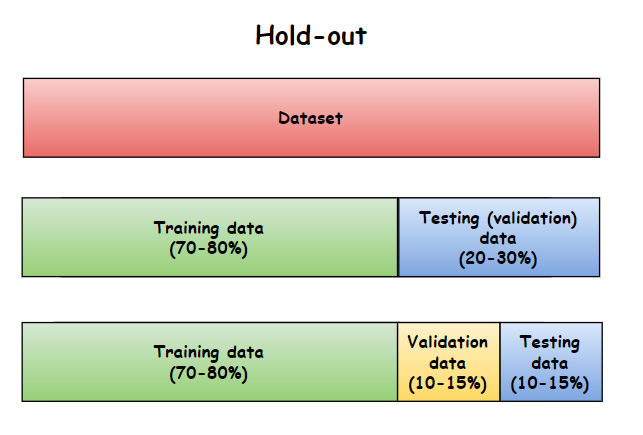

Преимущества и недостатки hold-out:

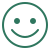

- Очень простой и понятный.
- Чаще всего применяется на больших датасетах, так как требует значительно меньше вычислительных мощностей, чем другие методы.

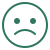

- Важно помнить, что разбиение производится случайным образом и оценка в этом методе зависит от того, какие наблюдения попали в набор для валидации. Это плохо, так как возможна ситуация, когда распределение целевого признака в тренировочной, валидационной (и тестовой) выборках может значительно различаться, и оценка качества может быть необъективной.

Метод hold-out реализован в уже знакомой вам функции **train_test_split()**. Она предназначена для разбиения исходного набора данных случайным образом на две части в заданных соотношениях.

In [3]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42)

print('Train shape: {}'.format(X_train.shape))
print('Valid shape: {}'.format(X_valid.shape))

Train shape: (2620, 9)
Valid shape: (656, 9)


Итак, 2620 образцов воды являются обучающими — в них модель будет искать закономерности и подбирать внутренние параметры, а 656 являются валидационными — на них мы будем производить контроль качества.

In [4]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
#Обучаем модель на тренировочной выборке
model.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Выводим значения метрик
print('Train hold-out accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Valid hold-out accuracy: {:.2f}'.format(metrics.accuracy_score(y_valid, y_valid_pred)))

Train hold-out accuracy: 0.82
Valid hold-out accuracy: 0.77


Если же мы используем трёхкомпонентный подход (разбиваем выборку на тренировочную, валидационную и отдельную тестовую)

In [5]:
#разбиваем исходную выборку на тренировочную и валидационную в соотношении 80/20
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42)
#разбиваем валидационную выборку на валидационную и тестовую в соотношении 50/50
X_valid, X_test, y_valid, y_test = model_selection.train_test_split(
    X_valid, y_valid, test_size=0.5, random_state=42)

print('Train shape: {}'.format(X_train.shape))
print('Valid shape: {}'.format(X_valid.shape))
print('Test shape: {}'.format(X_test.shape))


Train shape: (2620, 9)
Valid shape: (328, 9)
Test shape: (328, 9)


В этом случае мы будем обучаться на 2620 примерах, 328 будем использовать для промежуточного контроля и подбора внешних параметров и ещё 328 будут нашим контрольным рубежом — их мы будем использовать для принятия финального решения о качестве модели.

**<center> K-FOLD </center>**

Метод k-fold более известен как кросс-валидация (cross validation), или перекрёстный контроль. 

Алгоритм кросс-валидации:

1. Разбить исходную выборку на k частей — фолдов (fold).
2. Повторять k раз:
- Обучить модель на k-1 частях. Назовём их тренировочными фолдами (training fold). 
- Произвести оценку качества (вычислить метрику) на оставшейся части. Назовем её валидационным фолдом (validation fold).
3. Усреднить значения метрики на валидационных фолдах.

На рисунке ниже представлена схема работы кросс-валидации с предварительно выделенной для тестирования выборкой, то есть первоначально весь датасет разделяется на тренировочную и тестовую (отложенную) выборки. Тестовые данные (testing data) используются только для финального контроля качества и сравнения моделей между собой. Тренировочные данные (training data) используются для кросс-валидации, разделяясь при каждой итерации на тренировочные и валидационные фолды (training fold и validation fold):

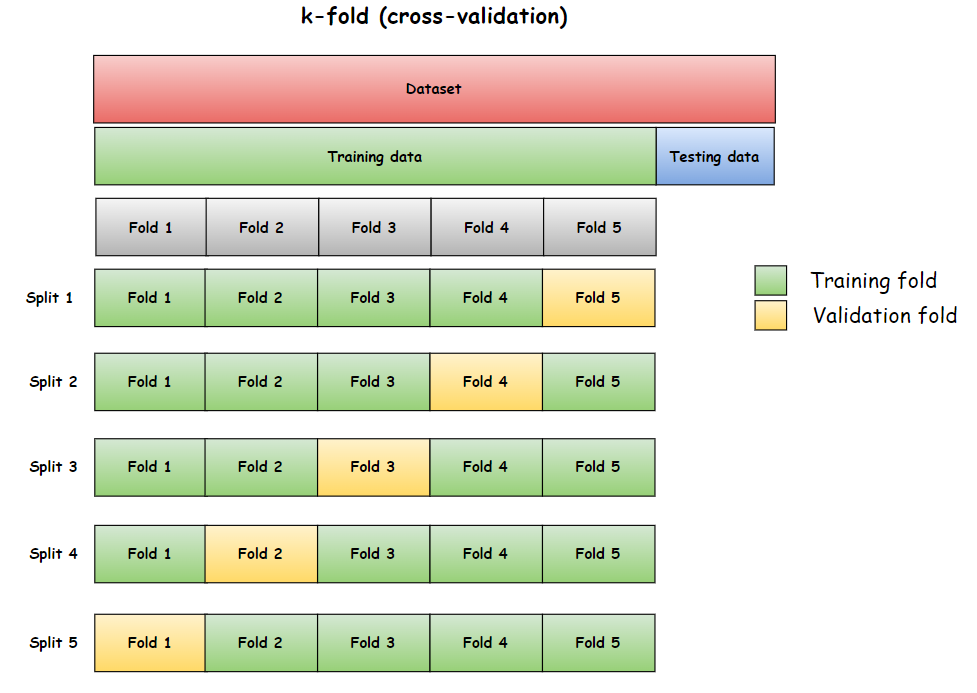

Преимущества и недостатки k-fold:

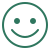

- Подход позволяет получить более устойчивую к выбросам оценку качества модели, так как модель обучается на нескольких независимых наборах данных.
- Значения метрик получаются более объективными, ведь мы обучаем одну модель k раз — у нас получается k независимых друг от друга значений метрики.

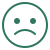

- Подход предусматривает, что мы обучаем одну и ту же модель k раз, что, очевидно, плохо сказывается на производительности. Если модель обучается довольно медленно (например, сложная нейронная сеть), то валидация может занять очень много времени.

В библиотеке sklearn метод k-fold реализован в классе KFold.

In [6]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
#Создаём список для хранения тренировочных и валидационных метрик
train_metrics = []
val_metrics = []
#Организуем цикл для кросс-валидации (используем весь набор данных)
#train_index — индексы тренировочной выборки
#valid_index — индексы валидационной выборки
for train_index, valid_index in kf.split(X, y): 
    #Создаём тренировочную и валидационную выборку, обращаясь по текущим индексам
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_valid, y_valid = X.iloc[valid_index], y.iloc[valid_index]
    #Обучаем дерево решений на тренировочной выборке
    model.fit(X_train, y_train)
    #Делаем предсказание для каждой из выборок
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    #Рассчитываем метрику и заносим её в список
    train_metrics.append(metrics.accuracy_score(y_train, y_train_pred))
    val_metrics.append(metrics.accuracy_score(y_valid, y_valid_pred))
    
print(train_metrics)
print(val_metrics)

print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(train_metrics)))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(val_metrics)))

[0.8034351145038168, 0.8168637924456315, 0.8027470431133156, 0.8267836703548264, 0.8157191911484166]
[0.7957317073170732, 0.7053435114503817, 0.7358778625954199, 0.7282442748091603, 0.732824427480916]
Train k-fold mean accuracy: 0.81
Valid k-fold mean accuracy: 0.74


если использовать специальную функцию для кросс-валидации — cross_validate() из модуля model_selection. Она организует процедуру кросс-валидации и расчёт метрик.

In [7]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)

print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

{'fit_time': array([0.03298211, 0.03597808, 0.03100181, 0.02998352, 0.03098607]),
 'score_time': array([0.0019989 , 0.00299764, 0.00199842, 0.00199413, 0.0019989 ]),
 'test_score': array([0.79573171, 0.70534351, 0.73587786, 0.72824427, 0.73282443]),
 'train_score': array([0.80343511, 0.81686379, 0.80274704, 0.82678367, 0.81571919])}

Train k-fold mean accuracy: 0.81
Valid k-fold mean accuracy: 0.74


**<center> LEAVE-ONE-OUT </center>**

**Метод leave-one-out (отложенный пример)**, или **поэлементная кросс-валидация** — это частный случай кросс-валидации (k-fold), когда размер k равняется размеру всей выборки k=n, где n — количество примеров (строк в таблице).

Алгоритм метода:

1. Повторять n раз:
- Выбрать один случайный пример для валидации.
- Обучить модель на всех оставшихся n-1 примерах.
- Произвести оценку качества (вычислить метрику) на отложенном примере.
2. Усреднить значение метрик на всех примерах.

Преимущества и недостатки leave-one-out:

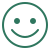

- Идеально подходит для небольших датасетов (менее 100 примеров).
- Поскольку все доступные данные используются как для обучения, так и для валидации, значения метрик наиболее объективны и надёжны.

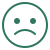

Подход предусматривает, что мы обучаем одну и ту же модель n раз. Очевидно, что чем больше примеров в обучающем наборе данных, тем больше моделей мы будем обучать. Поэтому метод не подходит для оценки качества модели на больших наборах данных, поскольку становится очень ресурсозатратным.

В библиотеке sklearn метод leave-one-out реализован в классе LeaveOneOut. Параметров инициализации у данного класса нет.

**Примечание.** Метод leave-one-out можно реализовать и без использования специального класса — достаточно просто указать параметр n_split=n в инициализаторе KFold, где n — количество строк в таблице.

In [8]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём кросс-валидатор LeaveOneOut
loo = model_selection.LeaveOneOut()
 
#Считаем метрики на кросс-валидации leave-one-out
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X.iloc[:500], #матрица наблюдений X
    y=y.iloc[:500], #вектор ответов y
    cv=loo, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
 
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean accuracy: 0.95
Valid k-fold mean accuracy: 0.90


## **3. Дисбаланс выборки**

✍ Следующий момент, на который стоит обращать внимание во время построения модели и оценки её качества — **это дисбаланс выборки**.

**Несбалансированный набор данных (unbalanced dataset)** — это выборка, в которой количества примеров каждого из классов значительно отличаются.

При этом:

- класс большинства называется мажоритарным (majority) классом;
- класс меньшинства называется миноритарным (minority) классом.

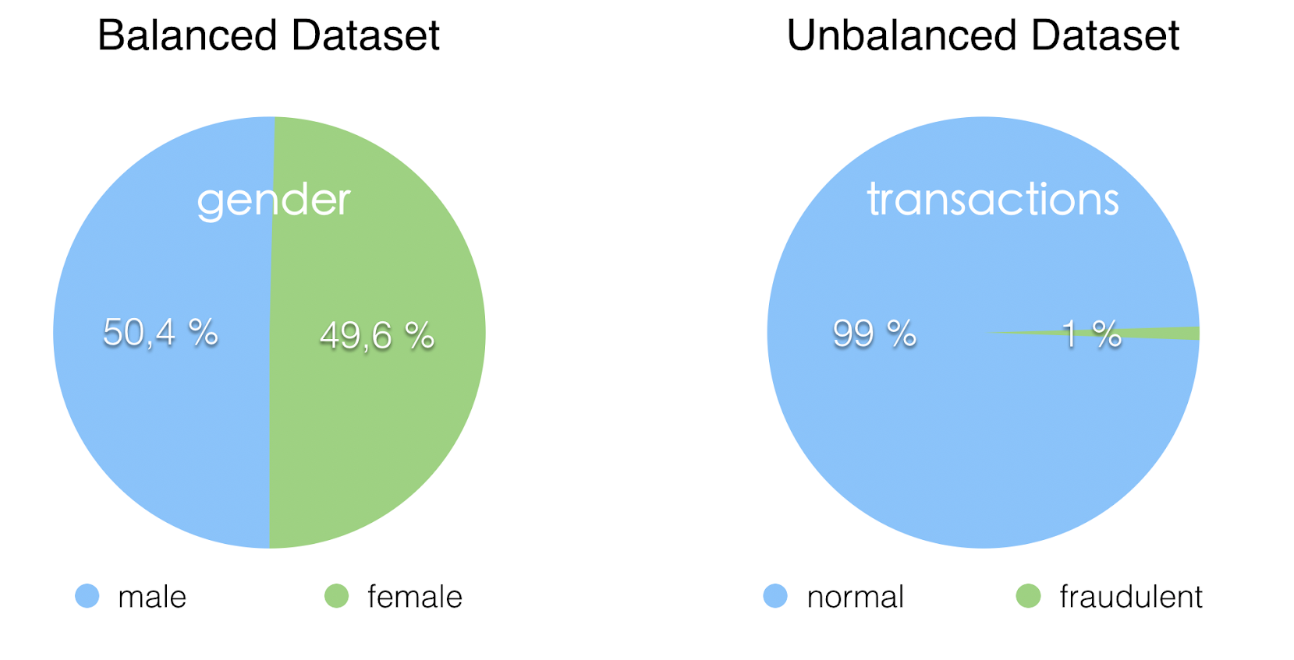

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

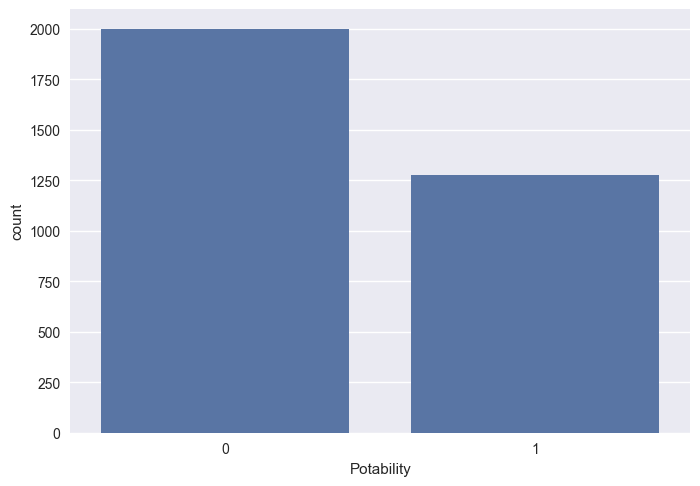

In [9]:
display(water_data['Potability'].value_counts(normalize=True))
sns.countplot(data=water_data, x='Potability');

**<center> СТРАТИФИЦИРОВАННОЕ РАЗБИЕНИЕ </center>**

Для того чтобы снизить влияние дисбаланса классов при разбиении выборки, в наборе данных используется специальный тип разбиения, который называется **стратифицированным (stratified)**. Данное разбиение предполагает, что наблюдения, принадлежащие каждому из классов, гарантированно попадут в каждый из наборов данных в одинаковой пропорции.

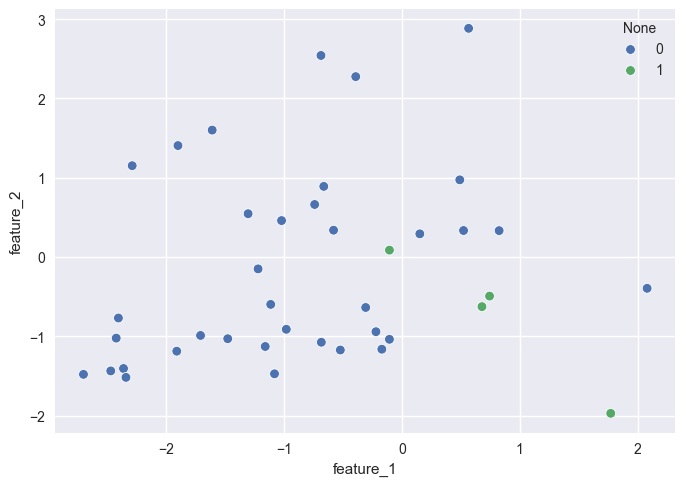

In [10]:
# Задание 3.3

from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=200, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    weights=[1, 0.2], #пропорции классов
    random_state=40 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

sns.scatterplot(x=X_valid['feature_1'], y=X_valid['feature_2'], hue=y);

**<center> ВЫБОР МЕТРИК В УСЛОВИЯХ ДИСБАЛАНСА КЛАССОВ </center>**

используются метрики, которые концентрируются на каждом из классов отдельно, — это знакомые нам из модуля по классификации precision, recall и F1-score.

Давайте на примере посмотрим, насколько важен выбор метрики в случае дисбаланса выборки.

Разобьём выборку на тренировочную и валидационную в соотношении 80/20, используя стратифицированное разбиение, затем обучим модель дерева решений, сделаем предсказание для каждой из выборок и сформируем отчёт о метриках на валидационной выборке с помощью функции classification_report().

In [11]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42, #генератор случайных чисел
)
#Обучаем модель на тренировочной выборке
model.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Выводим значения метрик
print(metrics.classification_report(y_valid, y_valid_pred)) 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.50      0.50      0.50         4

    accuracy                           0.90        40
   macro avg       0.72      0.72      0.72        40
weighted avg       0.90      0.90      0.90        40



**Примечание.** Поскольку простая accuracy вызывает сомнения в задачах с сильным дисбалансом, были разработаны специальные метрики, основанные на accuracy: это функционал Каппа Коэна (Cohen’s Kappa) и balanced accuracy.

In [12]:
# Задание 3.5

from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=200, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    weights=[1, 0.2], #пропорции классов
    random_state=40 #генератор случайных чисел
)
X_train, X_valid, y_train, y_valid= model_selection.train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)

y_valid_pred = log_reg.predict(X_valid)
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.50      0.25      0.33         4

    accuracy                           0.90        40
   macro avg       0.71      0.61      0.64        40
weighted avg       0.88      0.90      0.88        40



**<center> ПОСТРОЕНИЕ МОДЕЛИ В УСЛОВИЯХ ДИСБАЛАНСА КЛАССОВ </center>**

Существует несколько способов уменьшить влияние дисбаланса на обучение модели:

1. **Взвешивание объектов.** В функцию ошибки добавляется штраф, обратно пропорциональный количеству объектов каждого класса. Это очень похоже на регуляризацию, которую мы изучали ранее.
2. **Выбор порога вероятности.** Этот подход мы с вами тоже уже использовали ранее. Он заключается в том, что мы подбираем такой порог вероятности (по умолчанию он равен 0.5 во всех моделях), при котором на валидационной выборке максимизируется целевая метрика (например, F1-score).
3. **Сэмплирование (sampling)** — перебалансировка выборки искусственным путём:
- **oversampling** — искусственное увеличение количества объектов миноритарного класса;
- **undersampling** — сокращение количества объектов мажоритарного класса.

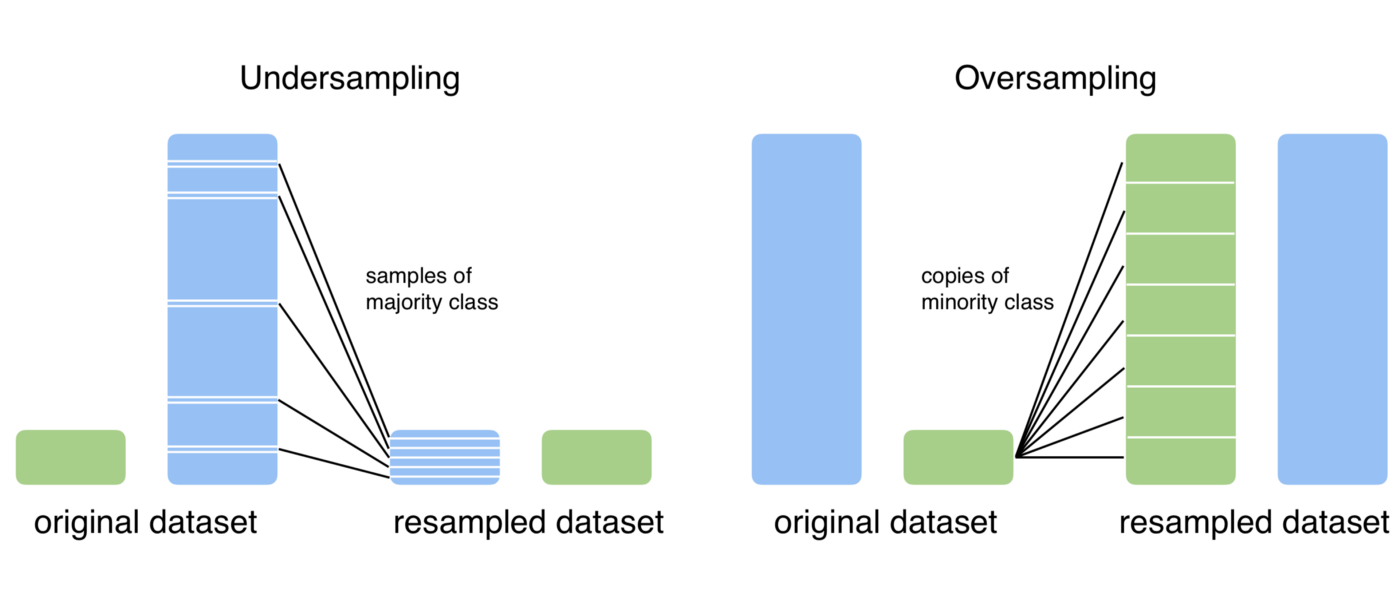

Здесь могут использоваться алгоритмы генерации искусственных данных, такие как NearMiss, SMOTE (Synthetic Minority Oversampling Techniques) и ADASYN (Adaptive Synthetic).

Мы рассмотрим наиболее популярный алгоритм — SMOTE.

**ВЗВЕШИВАНИЕ ОБЪЕКТОВ**

Большинство моделей, реализованных в sklearn, имеют параметр class_weight — веса классов. Для того чтобы задать веса классам, достаточно в инициализаторе модели выставить параметр class_weight='balanced'.

Посмотрим на реализацию на примере дерева решений:

In [13]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42, #генератор случайных чисел
    class_weight='balanced' #веса классов
)
#Обучаем модель на тренировочной выборке
model.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Выводим значения метрик    
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.43      0.75      0.55         4

    accuracy                           0.88        40
   macro avg       0.70      0.82      0.74        40
weighted avg       0.92      0.88      0.89        40



In [14]:
# Задание 3.7

from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=200, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    weights=[1, 0.2], #пропорции классов
    random_state=40 #генератор случайных чисел
)
log_reg_balanced = linear_model.LogisticRegression(class_weight='balanced')
log_reg_balanced.fit(X_train, y_train)
y_valid_pred = log_reg_balanced.predict(X_valid)
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90        36
           1       0.33      0.75      0.46         4

    accuracy                           0.82        40
   macro avg       0.65      0.79      0.68        40
weighted avg       0.90      0.82      0.85        40



**ВЫБОР ПОРОГА ВЕРОЯТНОСТИ. PR-КРИВАЯ**

Следующий метод, о котором мы поговорим, — это **выбор порога вероятности (бинаризации)**.

**PR-кривая (precision-recall curve)** — это график зависимости precision от recall при различных значениях порога вероятности.

Для построения данного графика мы берём множество различных порогов вероятности (0.1, 0.15, 0.2, …1) и вычисляем метрики precision и recall при разных порогах вероятности.

**Что нам даёт такая кривая?**

1. Во-первых, PR-кривая — это графическая метрика качества модели, она комплексно отражает и precision, и recall одновременно (как F1-мера) и особенно хороша в условиях дисбаланса классов.

Качество определяется площадью (PR AUC) под кривой: чем ближе значение площади к 1, тем лучше модель. Идеальная модель — та, у которой площадь равна 1. У такой модели и precision, и recall равны 1. Конечно же, таких моделей не существует в природе.

Если площадь под PR-кривой меньше 0.5, модель считается очень слабой (качество её распознавания хуже, чем подбрасывание монетки).

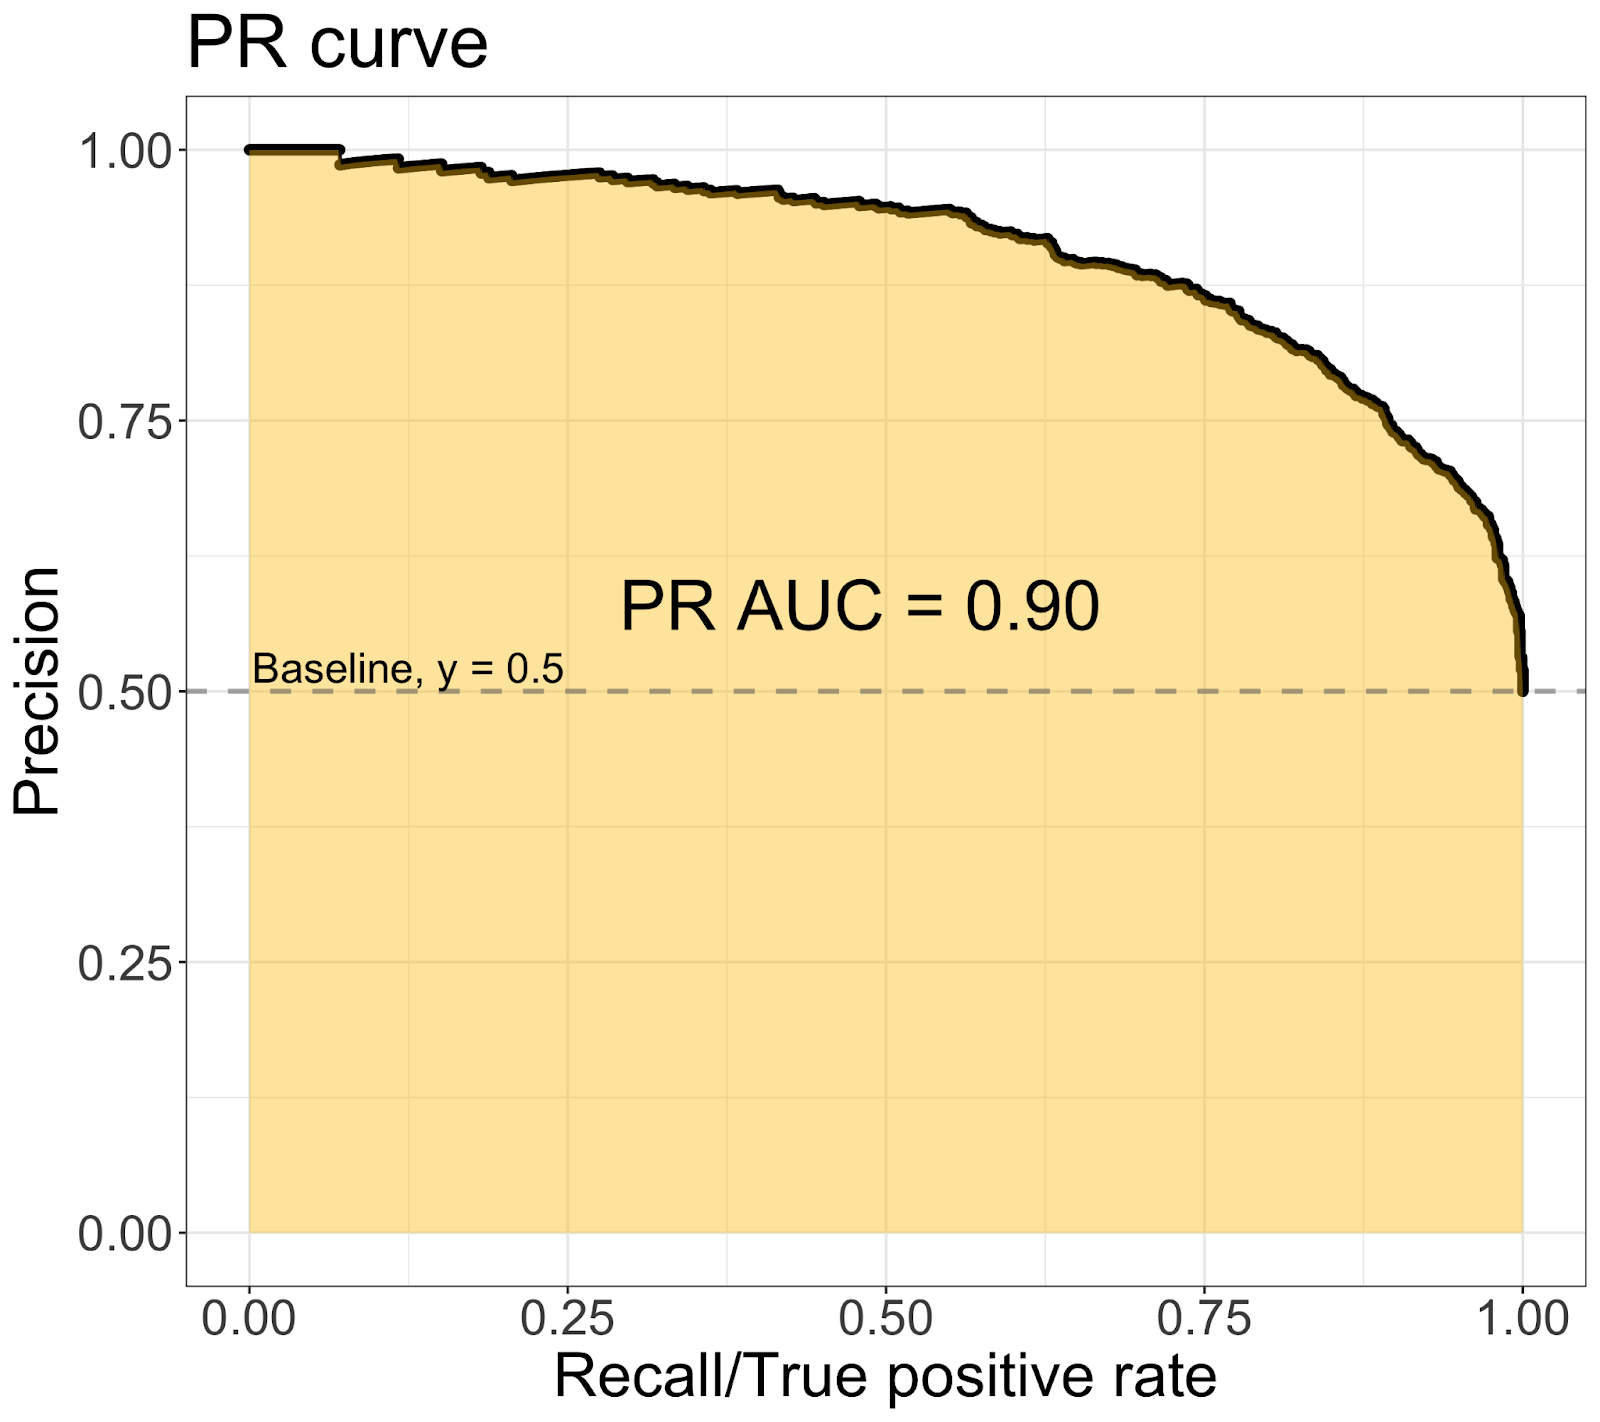

По площади под PR-кривой мы можем сравнивать модели между собой.

2. Во-вторых, с помощью PR-кривой удобно находить оптимальный порог вероятности. Главное — определиться с критерием этой оптимальности. На кривой мы можем найти такие точки, в которых наблюдается наилучшее значение precision или recall или среднее гармоническое между ними (F1-score).

Перед построением PR-кривой нам необходимо предсказать вероятности принадлежности к классу 1 на валидационных фолдах кросс-валидации.

Для предсказания вероятностей используем функцию cross_val_predict(). Данная функция выполняет кросс-валидацию и возвращает предсказания для валидационных фолдов. Если ей передать параметр method='predict_proba', она вернёт предсказанные вероятности для каждого из классов на всех фолдах. Остальные параметры аналогичны параметрам функции cross_validate().

**СЭМПЛИРОВАНИЕ**

Следующий подход работы в условиях дисбаланса классов, который мы рассмотрим, — **сэмплирование, а точнее — пересэмплирование (oversampling)**.

Идея очень проста: если у нас мало наблюдений миноритарного класса, следует искусственно увеличить их количество.

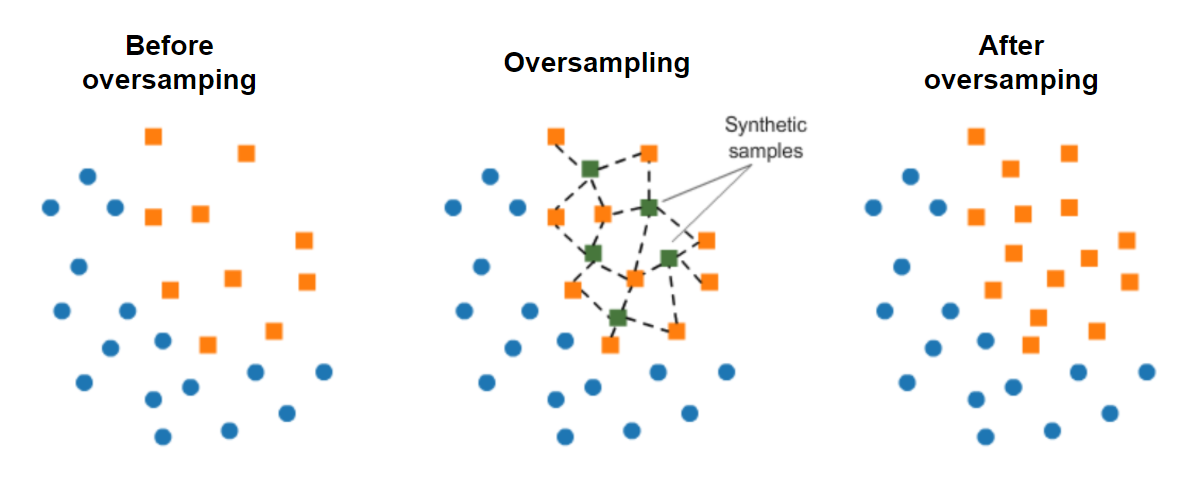

Простейшая стратегия пересэмплирования — продублировать объекты малого класса. Но это неинтересно и работает довольно плохо. Поэтому были созданы специальные алгоритмы генерации искусственных данных. Самый популярный из таких алгоритмов — **алгоритм SMOTE (Synthetic Minority Oversampling Techniques)**.

В основе алгоритма лежит идея генерации некоторого количества искусственных наблюдений, которые были бы «похожи» на наблюдения, имеющиеся в миноритарном классе, но при этом не дублировали их.

In [15]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import pandas as pd
from imblearn.over_sampling import SMOTE

X, y = datasets.make_classification(
    n_samples=200, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    weights=[1, 0.2], #пропорции классов
    random_state=40 #генератор случайных чисел
)

X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
X_train, X_valid, y_train, y_valid= model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)
log_reg_smote = linear_model.LogisticRegression(class_weight='balanced')
log_reg_smote.fit(X_train_s, y_train_s)
y_valid_pred = log_reg_smote.predict(X_valid)
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.43      0.75      0.55         4

    accuracy                           0.88        40
   macro avg       0.70      0.82      0.74        40
weighted avg       0.92      0.88      0.89        40



## **4. Недообучение и переобучение. Утечка данных**

Важной характеристикой алгоритма машинного обучения является его **обобщающая способность** — способность использовать знания, полученные при обучении, на новых данных.

Обобщающая способность часто страдает из-за двух основных проблем машинного обучения: **overfitting (переобучение) и underfitting (недообучение)**.

**Переобучение (overfitting)** — это проблема, при которой модель чувствительна к незначительным колебаниям в данных в процессе обучения. По сути, такая модель работает намного лучше с обучающими данными, чем с новыми. Она была чрезмерно натренирована на обнаружение уникальных характеристик обучающего набора данных, которые не являются общими закономерностями.

**Недообучение (underfitting)** — это проблема, при которой алгоритм недостаточно хорошо изучил данные и пропускает важные зависимости между признаками. В случае недообучения мы даже на обучающих данных не можем достичь приемлемых оценок для модели.

Недообучение и переобучение неразрывно связаны друг с другом: попытка бороться с одной проблемой может привести к возникновению другой, поэтому возникает **дилемма смещения-разброса (bias-variance tradeoff)**. 

**Смещение (bias)** — это математическое ожидание (обозначено далее как E) разности между истинным ответом и ответом, выданным моделью. То есть это ожидаемая ошибка модели.

Bias — это теоретическая характеристика недообучения.

**Разброс (variance)** — это вариативность ошибки, то, насколько ошибка будет отличаться, если обучать модель на разных наборах данных. 

Variance — это теоретическая характеристика переобучения.

В случае задачи регрессии underfitting и overfitting можно проиллюстрировать следующим образом:

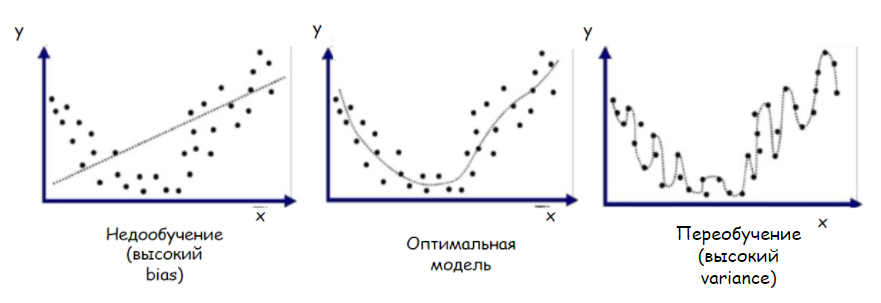

На первом графике изображена простая модель линейной регрессии, не способная уловить сложную зависимость в данных. На втором — оптимальная модель, которая хорошо описывает зависимость и при этом не имеет переобучения (полином четвёртой степени). На последнем графике изображён полином 27 степени, который подстроился под каждую точку в тренировочном наборе, но не смог уловить общие закономерности.

Underfitting и overfitting в случае задачи классификации:

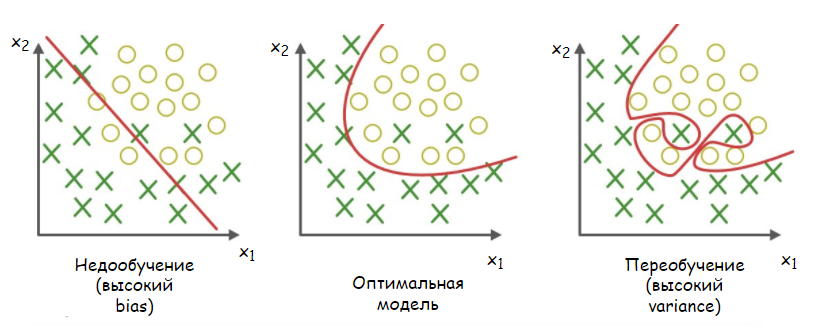

На рисунке изображены три различные модели: первая — простая логистическая регрессия, вторая — логистическая регрессия, обученная на полиномиальных признаках второй степени, третья — логистическая регрессия, обученная на полиномиальных признаках десятой степени. Видно, что первая модель обладает низким качеством и не обобщает общей зависимости (у неё высокое смещение). Третья же, напротив, идеально выделяет каждое наблюдение в правильный класс, но является переобученной и также не отражает общей зависимости (у неё высокий разброс). Оптимальной моделью является вторая, которая не подстраивается под индивидуальные наблюдения и отражает общую зависимость в данных.

**КАК ОБНАРУЖИТЬ ПЕРЕОБУЧЕНИЕ**

Переобучение легко детектируется с помощью изученных нами методов валидации: мы намеренно разбиваем выборку на тренировочную и валидационную (возможно, и тестовую) и смотрим на значения показателей на каждой из выборок, сравнивая их между собой.

**Основные способы отследить переобучение:**

1. hold-out-разбиение,
2. k-fold-валидация и leave-one-out-валидация,
3. кривые обучения (learning curves).

Если качество на валидационной выборке стабильно хуже качества на тренировочной, то это явный признак переобучения.

**МЕТОДЫ БОРЬБЫ С ПЕРЕОБУЧЕНИЕМ**

1. Уменьшение сложности модели
2. Регуляризация. С помощью добавления штрафа в функцию потерь мы намеренно пытаемся увеличить смещение модели, чтобы уменьшить разброс. Закон баланса в действии!
3. Манипуляции с данными. Ещё один верный способ побороть переобучение — увеличить или уменьшить количество примеров, на которых обучается модель.
- Увеличивать набор данных можно за счёт проведения новых экспериментов и сбора новой информации.
- Уменьшать набор данных можно за счёт удаления выбросов и аномалий из обучающего набора данных, из-за которых отчасти и происходит переобучение модели.
Также можно отбирать наиболее значимые признаки, которые в наибольшей степени влияют на предсказания модели.

**УТЕЧКА ДАННЫХ**

Стоит упомянуть об ещё одной проблеме современного машинного обучения, которая называется **утечкой данных.** Данная проблема несколько похожа на проблему переобучения, но имеет другой характер.

**Утечка данных (data leak)** — это ситуация, в которой данные, используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной.

Приведём несколько примеров, когда может возникнуть утечка данных:

1. *очевидные случаи*

- Наиболее очевидной ситуацией утечки данных является включение целевой переменной, которую мы пытаемся предсказать, в качестве фактора, что полностью уничтожает цель «прогнозирования». Это может быть сделано по ошибке, но важно убедиться, что целевая переменная отличается от признаков.

- Другой распространённой причиной утечки данных является включение тестовых данных в данные по обучению модели, а затем использование этих же тестовых данных для оценки качества модели.

2. *Скрытые случаи, или giveaway-признаки*

**Giveaway** — это признаки, которые раскрывают информацию о целевой переменной и не будут доступны после развёртывания модели в реальных условиях. Такие признаки необходимо удалять из данных перед построением модели.

**Как обнаружить утечку данных**

*1. Читайте описание признаков.*

Из описания признаков всегда можно узнать полезную информацию и обнаружить утечку с помощью банальной логики. Если вы предсказываете цену товара, а в вашем наборе данных есть признак цены этого товара со скидкой, очевидно, что данный признак стоит удалить из обучающего набора данных.

*2. Проверяйте корреляции с целевым признаком.*

В процессе разведывательного анализа вы можете обнаружить признаки, которые очень сильно коррелируют с целевой переменной. Конечно, такая корреляция может быть естественной и не сопровождаться утечкой, например корреляция между количеством комнат в квартире и её ценой. Однако высокая степень корреляции между налоговой выплатой за продажу и ценой квартиры — это яркий пример утечки.

*3. Относитесь скептически к подозрительно высокому качеству моделей.*

При построении модели вас может насторожить слишком высокое качество даже самых простых моделей, которого в реальных условиях достичь не удалось бы. Это может быть сигналом о наличии утечки данных.

Train accuracy: 0.98
Valid accuracy: 0.82


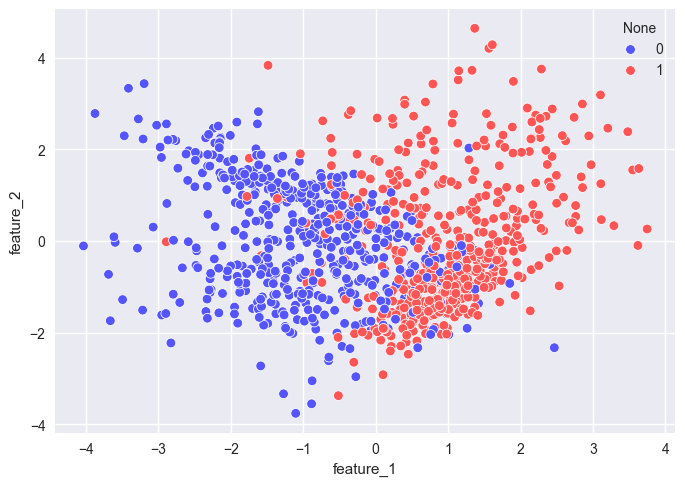

In [16]:
# Задание 4.3

from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    n_clusters_per_class=2, #количество кластеров внутри класса
    random_state=1 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic');
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
print('Train accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Valid accuracy: {:.2f}'.format(metrics.accuracy_score(y_valid, y_valid_pred)))

Train accuracy: 0.88
Valid accuracy: 0.85


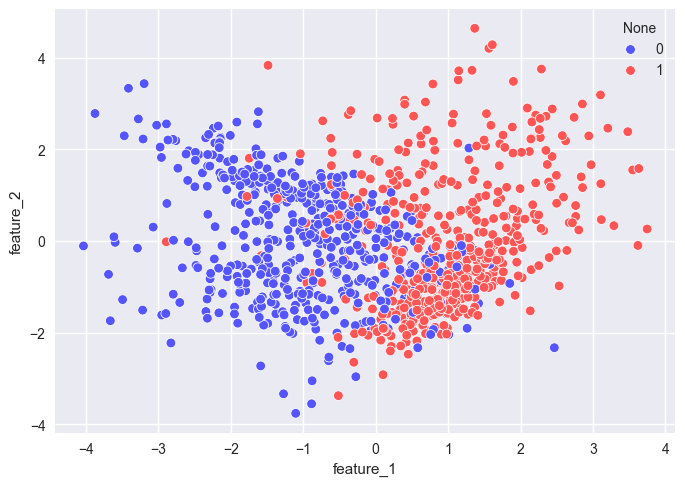

In [17]:
# Задание 4.6

from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    n_clusters_per_class=2, #количество кластеров внутри класса
    random_state=1 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic');
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
print('Train accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Valid accuracy: {:.2f}'.format(metrics.accuracy_score(y_valid, y_valid_pred)))

## **5. Кривая обучения**

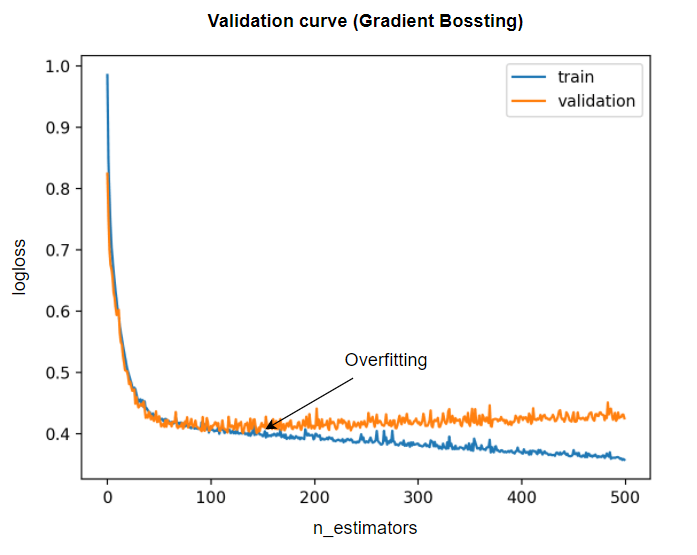

Такая кривая называется **валидационной кривой (validation curve)**, и она позволяет увидеть, как изменяется метрика в зависимости от значения внешнего параметра.

**Кривые обучения (learning curve)** - позволяют легко определять наличие переобучения и недообучения, визуально сравнивать модели между собой и увидеть, как качество модели зависит от добавления новых данных.

**Кривая обучения (learning curve)** — это график зависимости некоторой метрики на обучающем (валидационном) наборе данных от количества объектов, которые участвуют в обучении модели.

*Что нам дают такие кривые?*

1. Основное назначение кривых обучения — **мониторинг изменения метрики в процессе поступления новых данных**. Благодаря этому мы можем найти такой размер данных, начиная с которого обогащение набора данных новыми наблюдениями не приносит значительного эффекта.

2. Благодаря кривым обучения мы можем отслеживать недообучение и переобучение модели.

3. Кривые обучения позволяют визуально сравнить качество различных моделей.

Для вычисления точек для построения кривых обучения в модуле model_selection библиотеки sklearn есть функция **learning_curve().**

In [18]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

## **6. Практика**

In [19]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import ensemble #ансамбли

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

shoppers_data = pd.read_csv('data/online_shoppers_intention.csv')
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [20]:
print(shoppers_data.shape)

(12330, 18)


In [21]:
shoppers_data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [22]:
dummy_data = pd.get_dummies(shoppers_data)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


Sessions without purchase : 84.53%
Sessions with purchase: 15.47%


C:\Users\IK\AppData\Local\Temp\ipykernel_4352\343597258.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Sessions without purchase : {:.2f}%'.format(class_percent[0]))
C:\Users\IK\AppData\Local\Temp\ipykernel_4352\343597258.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Sessions with purchase: {:.2f}%'.format(class_percent[1]))


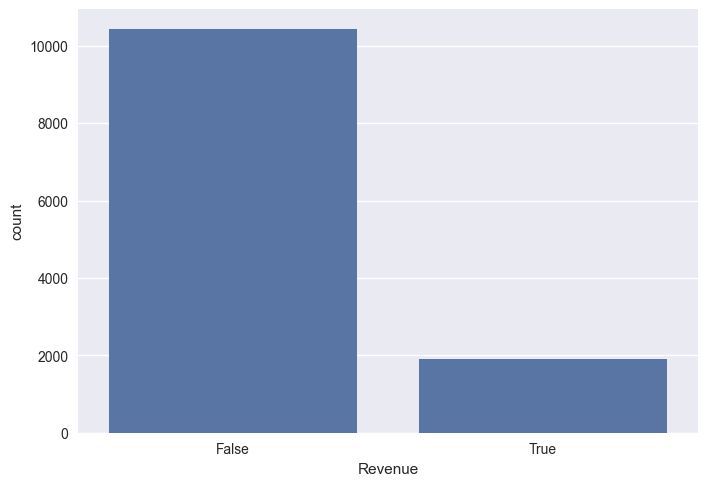

In [23]:
# Итак, нам необходимо предсказать целевую переменную
# Revenue — признак покупки. Целевой признак является
# бинарным категориальным, то есть мы решаем задачу
# бинарной классификации. В первую очередь посмотрим
# на соотношение классов в данных:

sns.countplot(x='Revenue', data=dummy_data)
class_percent = dummy_data['Revenue'].value_counts(normalize=True) * 100
print('Sessions without purchase : {:.2f}%'.format(class_percent[0]))
print('Sessions with purchase: {:.2f}%'.format(class_percent[1]))

In [24]:
X, y = dummy_data.drop('Revenue', axis=1), dummy_data['Revenue']

In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)
print('Train:\n', y_train.value_counts(normalize=True), sep='')
print('Valid:\n', y_test.value_counts(normalize=True), sep='')

Train shape: (9864, 28)
Test shape: (2466, 28)
Train:
Revenue
False    0.845296
True     0.154704
Name: proportion, dtype: float64
Valid:
Revenue
False    0.845093
True     0.154907
Name: proportion, dtype: float64


In [31]:
# Задание 6.3

model = ensemble.RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

skf = model_selection.StratifiedKFold(n_splits=5)

cv_metrics = model_selection.cross_validate(
    model, X_train, y_train, cv=skf, scoring='f1', return_train_score=True
) 

print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score']))) 
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score']))) 

Train k-fold mean f1: 1.00
Valid k-fold mean f1: 0.65


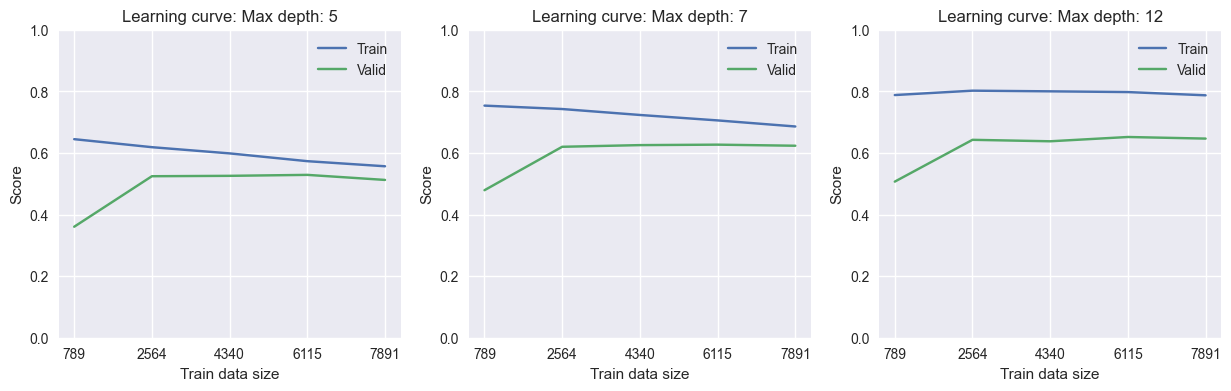

In [32]:
# Задание 6.5

def plot_learning_curve(model, X, y, cv, scoring='f1', ax=None, title=''):
    #Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator = model, #модель
        X = X, #матрица наблюдений X
        y = y, #вектор ответов y
        cv = cv, #кросс-валидатор
        scoring = 'f1' #метрика
    )
    #Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    #Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
    #Строим кривую обучения на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label='Train')
    #Строим кривую обучения на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label='Valid')
    #Даём название графику и подписи осям
    ax.set_title('Learning curve: {}'.format(title))
    ax.set_xlabel('Train data size')
    ax.set_ylabel('Score')
    #Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    #Устаналиваем диапазон оси ординат
    ax.set_ylim(0, 1)
    #Отображаем легенду
    ax.legend();

#Список из глубин деревьев
depths = [5, 7, 12]
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Визуализируем кривые обучения
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) #фигура + три координатных плоскости
#Создаём цикл по списку глубин и индексам этого списка
for i, depth in enumerate(depths): #i-текущий индекс, depth — текущая глубина
    #Создаём модель
    model = ensemble.RandomForestClassifier(
        n_estimators=200,
        max_depth=depth,
        min_samples_leaf=5,
        random_state=42
    )
    #Строим кривую обучению
    plot_learning_curve(model, X_train, y_train, skf, ax=axes[i], title=f'Max depth: {depth}')

In [33]:
# Задание 6.6

model = ensemble.RandomForestClassifier(
    n_estimators=200, 
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train, y_train)
y_test_predict = model.predict(X_test)
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.79      0.49      0.60       382

    accuracy                           0.90      2466
   macro avg       0.85      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466



In [34]:
# Задание 6.7

#Создаём модель
model = ensemble.RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)
#Обучаем модель
model.fit(X_train, y_train)
#Создаём кросс-валидатор k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Делаем предсказание вероятностей на кросс-валидации
y_cv_proba_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba')
#Выделяем столбец с вероятностями для класса 1
y_cv_proba_pred = y_cv_proba_pred[:, 1]

#Вычисляем координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)
#Вычисляем F1-score при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума F1
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(recall, precision)
#Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
#Даём название графику и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

SyntaxError: invalid syntax (2010080118.py, line 1)